In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud

from collections import Counter

In [2]:
reviews = pd.read_csv("data/derived/restaurant_reviews_textblob.csv", sep="\t")
reviews.head()

,Review,Liked,Category
0,Wow... Loved this place.,1,1
1,Crust is not good.,0,1
2,Not tasty and the texture was just nasty.,0,1
3,Stopped by during the late May bank holiday of...,1,0
4,The selection on the menu was great and so wer...,1,1


In [3]:
incorrectly_annotated_reviews = []
for i, review in reviews.iterrows():
    liked = review['Liked']
    category = review['Category']

    if liked != category:
        incorrectly_annotated_reviews.append(review['Review'].lower())

In [4]:
review_tokens = []
review_words = ""

for review in incorrectly_annotated_reviews:
    tokens = word_tokenize(review)
    review_tokens.extend(tokens)
    review_words += " ".join(tokens) + " "

Generating wordcloud

In [5]:
stop_words = set(stopwords.words('english'))

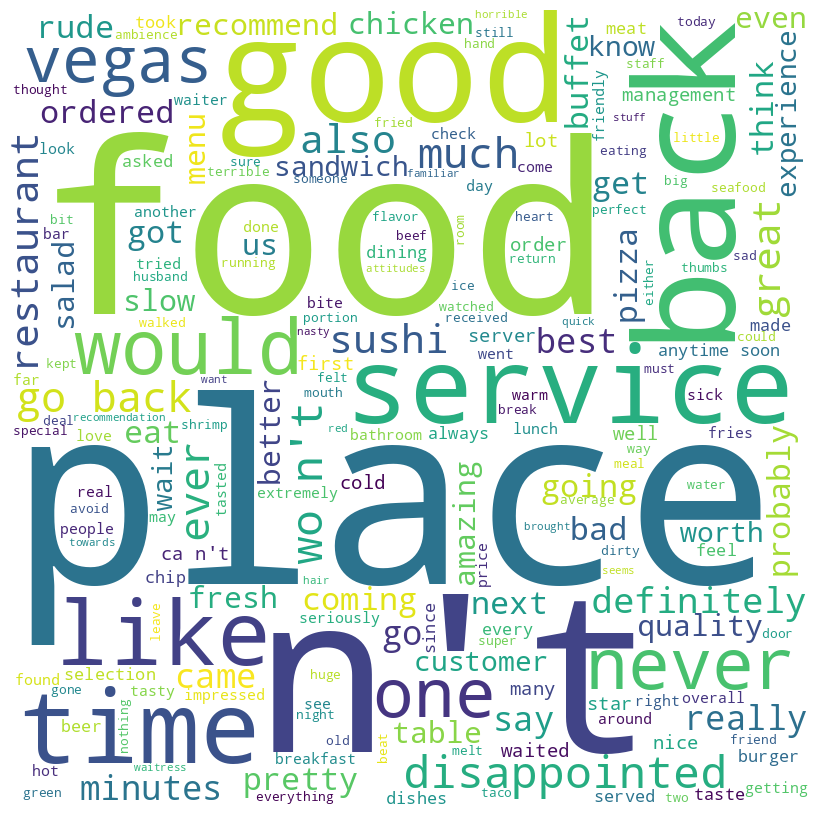

In [6]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(review_words)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

Generating bar graph

In [7]:
punctuation = [".", ",", "!","n\'t","\'s"]

filtered_review_tokens = []
for token in review_tokens:
    if token not in stop_words and token not in punctuation:
        filtered_review_tokens.append(token)

In [8]:
word_counter = Counter(filtered_review_tokens)
most_occur = word_counter.most_common(10)

words = []
word_counts = []
for instance in most_occur:
    words.append(instance[0])
    word_counts.append(instance[1])

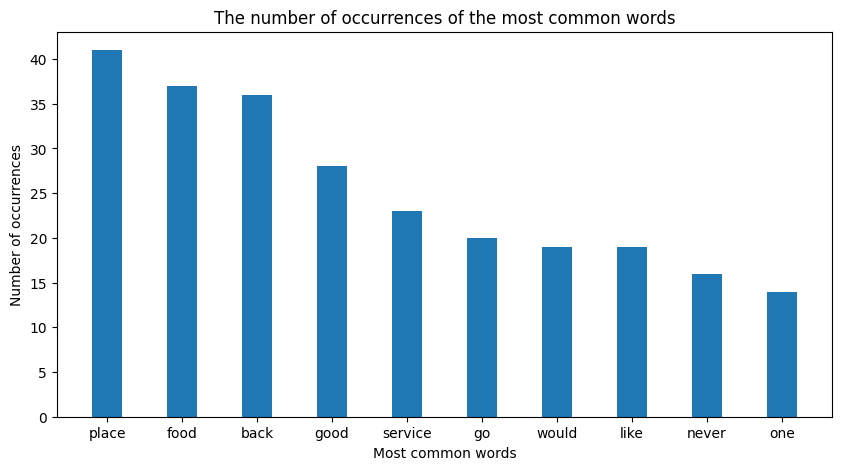

In [9]:
fig = plt.figure(figsize=(10, 5))

# creating the bar plot
plt.bar(words, word_counts, width=0.4)

plt.xlabel("Most common words")
plt.ylabel("Number of occurrences")
plt.title("The number of occurrences of the most common words")
plt.show()